In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
X=6*(np.random.rand(100,1))-3
Y=0.5*X**2+1.5*X+2+np.random.rand(100,1)

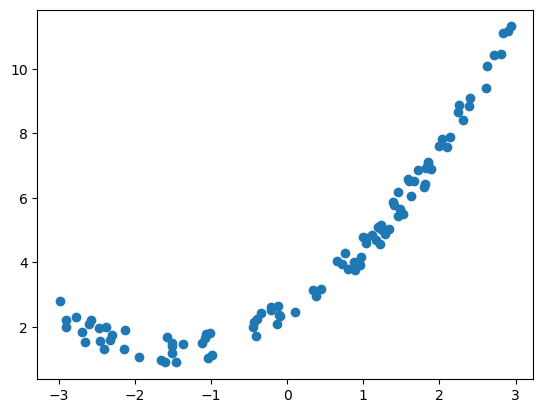

In [15]:
plt.scatter(X.ravel(),Y.ravel())
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()
regression_1.fit(x_train,y_train)
y_pred_1=regression_1.predict(x_train)


In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_train,y_pred_1)
print(score)

0.7772870337413895


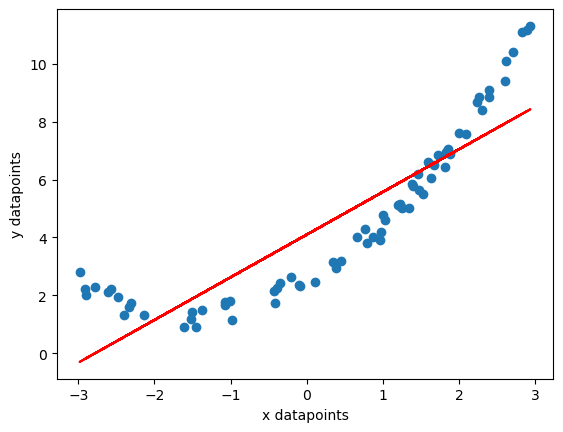

In [22]:
plt.plot(x_train,y_pred_1,color='r')
plt.scatter(x_train,y_train)
plt.xlabel('x datapoints')
plt.ylabel('y datapoints')
plt.show()

In [24]:
#applying 2D polynomial
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit(x_test)

In [25]:
#now apply sle
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred_poly=regression.predict(x_train_poly)


In [26]:
from sklearn.metrics import r2_score
score=r2_score(y_train,y_pred_poly)
print(score)

0.9917759472523021


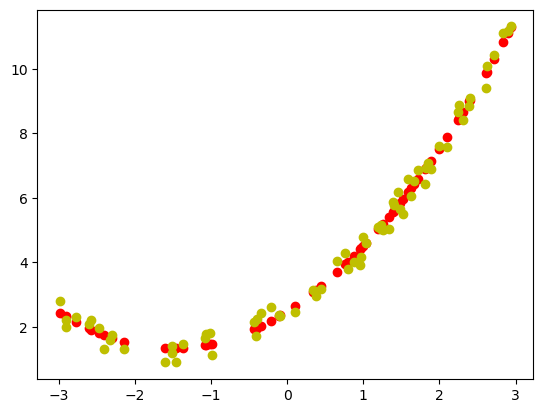

In [30]:
plt.scatter(x_train,y_pred_poly,color='r')
plt.scatter(x_train,y_train,color='y')
plt.show()

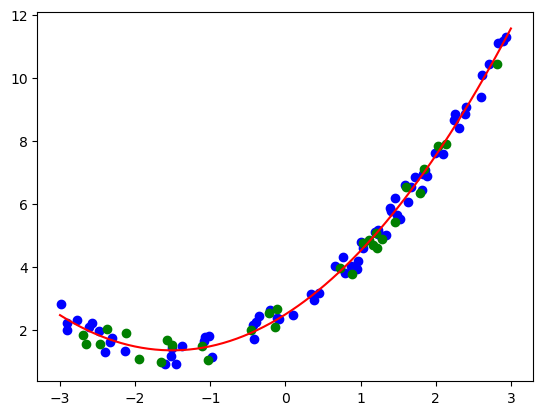

In [41]:
#prediction of new data
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new_pred=regression.predict(x_new_poly)
plt.plot(x_new, y_new_pred, color='r')
plt.scatter(x_train, y_train, color='b')
plt.scatter(x_test, y_test, color='g')
plt.show()


In [ ]:
#pipeline
from sklearn.pipeline import Pipeline
def poly_features(degree):
    x_new=np.linspace(-3,3,200).reshape(200,1)
    polynomial=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_features=Pipeline([
        ('polynomial',polynomial),
        ('lin_reg',lin_reg)
    ])
    poly_features.fit(x_train,y_train)
    y_new_pred=poly_features.predict(x_new)
    #visualize
    plt.plot(x_new, y_new_pred, color='r',label=degree)
    plt.scatter(x_train, y_train, color='b')
    plt.scatter(x_test, y_test, color='g')
    plt.xlabel('X dataset')
    plt.ylabel('Y dataset')
    plt.show()

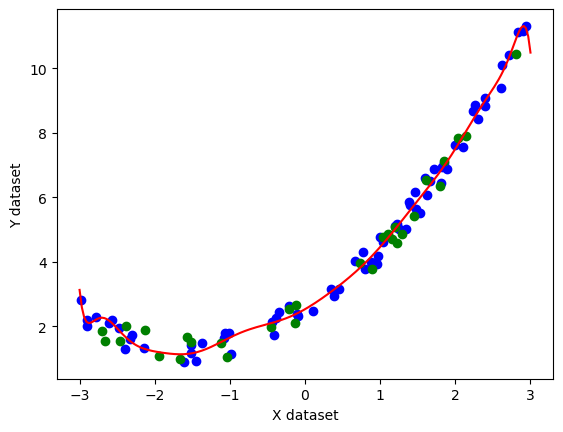

In [ ]:
poly_features(15)#overfitting

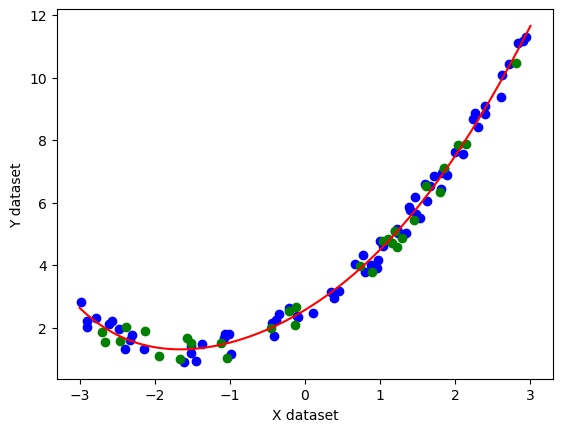

In [ ]:
poly_features(5) #perfect